In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
master = pd.read_csv("../data/master/studytime.csv")
master["day of week"] = pd.Categorical(master["day of week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [49]:
def to_stack_plot_data(master, term, order=[]):
    df = master[master["term"] == term]
    df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
    df = df.pivot(index=['term', "week", 'day of week'], columns='course', values='duration')
    df = df.groupby(['week']).agg('sum')
    if order != []:
        df = df[order]
    return df

In [50]:
classes_and_colors = {
    'fa23': {
        'order' : ["STAT 107", "PHYS 213/214", "MATH 241", "HIST 164"],
        'colors' : ['orange', 'purple', 'red', 'tan']
    },
    'sp24': {
        'order' : ["STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"],
        'colors' : ['orange', 'red', 'green', 'blue', 'tan']
    },
    'fa24': {
        'order' : ["IS 477", "CHEM 102/103", "GEOL 208", "ASTR 310", "ACES 179"],
        'colors' : ['orange', 'yellow', 'green', 'blue', 'tan']
    },
    'sp25': {
        'order' : ["CS 307", "CHEM 104/105", "GEOL 432", "ASTR 405", "Research"],
        'colors' : ['orange', 'yellow', 'green', 'blue', 'pink']
    },
}

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/758866373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/758866373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/758866373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

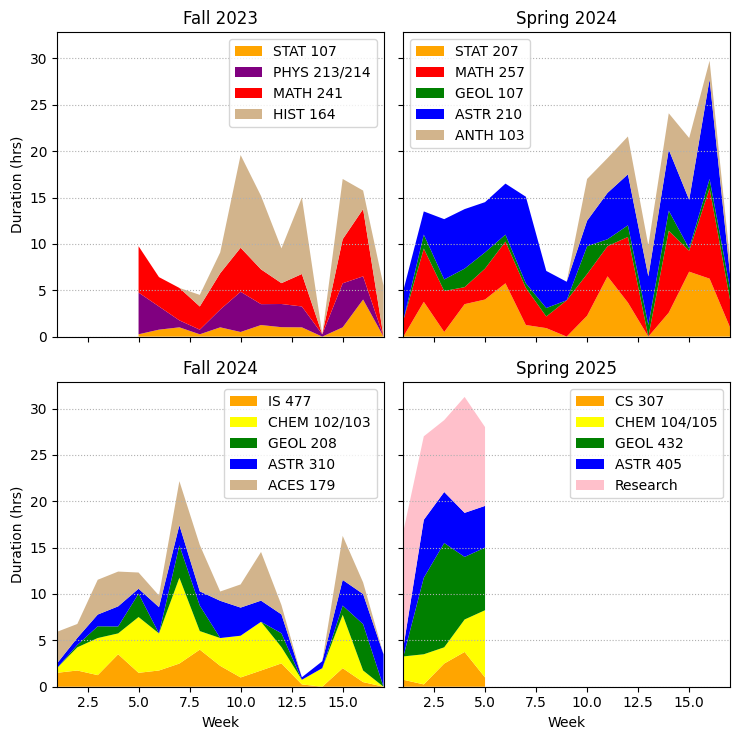

In [51]:
fig, ax = plt.subplots(2,2, figsize=[7.5,7.5], sharey=True, sharex=True)

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    df1 = to_stack_plot_data(master, term, classes_and_colors[term]['order'])
    ax[x,y].stackplot(df1.index, [df1[col]/60 for col in df1.columns], labels=df1.columns, colors=classes_and_colors[term]['colors'])
    ax[x,y].grid(axis='y', ls='dotted')
    ax[x,y].legend(df1.columns)
    if (x == 1):
        ax[x,y].set_xlabel("Week")
    if (y == 0):
        ax[x,y].set_ylabel("Duration (hrs)")


# FIGURE
# Subplot Titles
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
ax[1,1].set_title("Spring 2025")
# Axis Labels

# Axis Limit
plt.xlim(1, 17)

plt.tight_layout()
fig.savefig('../results/stackplot_by_class.png')

In [52]:
ds_group = ['STAT 107', 'STAT 207', 'IS 477', 'CS 307']
astro_group = ['ASTR 210', 'ASTR 310', 'ASTR 405']
gened_group = ['HIST 164', 'ANTH 103', 'ACES 179']
geol_group = ['GEOL 107', 'GEOL 208', 'GEOL 432']
stem_foundations = ['MATH 241', 'MATH 257', 'PHYS 213/214', 'CHEM 102/103', 'CHEM 104/105']

def find_group(course: str):
    if course in ds_group:
        return 'ds'
    elif course in astro_group:
        return 'astro'
    elif course in gened_group:
        return 'gened'
    elif course in geol_group:
        return 'geol'
    elif course in stem_foundations:
        return 'foundational'
    elif course == 'Research':
        return 'research'
    else:
        return 'other'

master['group'] = master['course'].apply(lambda x: find_group(x))
df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['duration']].reset_index()

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/2820810301.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groups = master.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['duration']].reset_index()


In [53]:
def to_stack_plot_data_groups(master, term):
    groups = ['foundational', 'ds', 'astro', 'geol', 'gened', 'other', 'research']
    df = master[master["term"] == term]
    df = df.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['duration']].reset_index()
    df = df.pivot(index=['term', "week", 'day of week'], columns='group', values='duration')
    df = df.groupby(['week']).agg('sum')

    for group in groups:
        if group not in df.columns:
            df[group] = 0

    df = df[groups]
    return df

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/2798752937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/2798752937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'group']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_25835/2798752937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

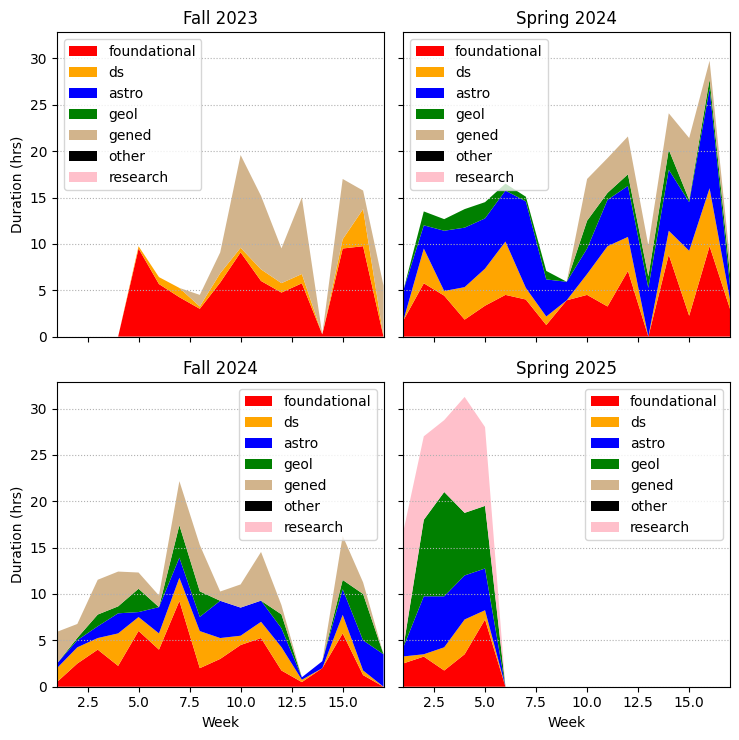

In [54]:
fig2, ax2 = plt.subplots(2,2, figsize=[7.5,7.5], sharey=True, sharex=True)

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    df1 = to_stack_plot_data_groups(df_groups, term)
    ax2[x,y].stackplot(df1.index, [df1[col]/60 for col in df1.columns], labels=df1.columns, colors=['red', 'orange', 'blue', 'green', 'tan', 'black', 'pink'])
    ax2[x,y].grid(axis='y', ls='dotted')
    ax2[x,y].legend(df1.columns)
    if (x == 1):
        ax2[x,y].set_xlabel("Week")
    if (y == 0):
        ax2[x,y].set_ylabel("Duration (hrs)")

# FIGURE
# Subplot Titles
ax2[0,0].set_title("Fall 2023")
ax2[0,1].set_title("Spring 2024")
ax2[1,0].set_title("Fall 2024")
ax2[1,1].set_title("Spring 2025")

# Axis Limit
plt.xlim(1, 17)

plt.tight_layout()
fig2.savefig('../results/stackplot_by_group.png')